In [ ]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.8/34.8 MB 14.2 MB/s eta 0:00:00


In [ ]:
!pip install torch

In [ ]:
!pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
!pip install tensorflow

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

1080 1920
Nose coordinates: (874.6064186096191, 509.9377369880676)


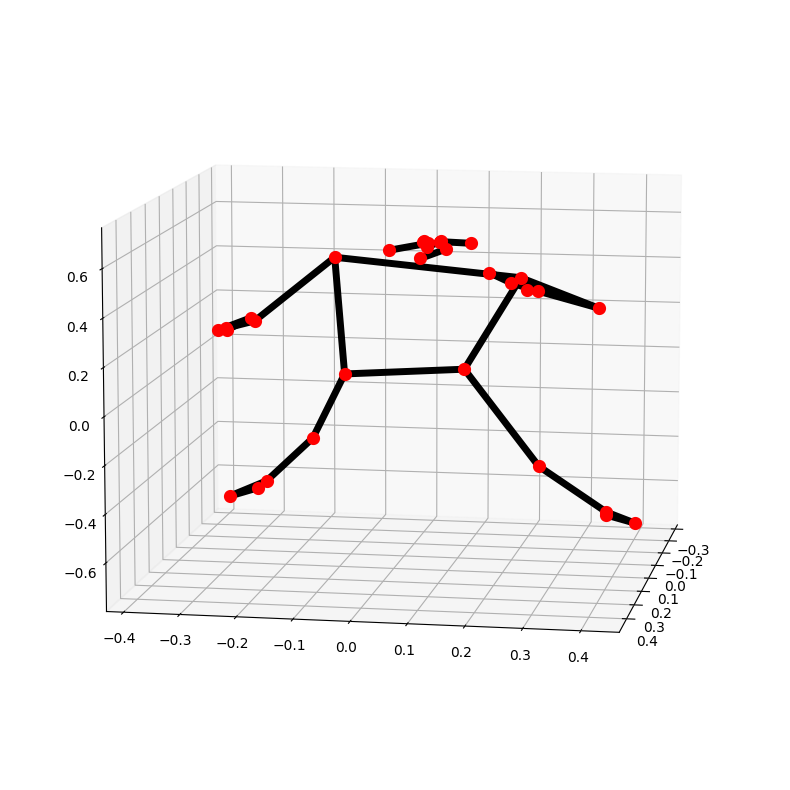

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

IMAGE_FILES = [" 1-0.jpeg"]
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    cv2.imwrite("Cropped Image.jpeg", image)
    image_height, image_width, _ = image.shape
    print(image_height, image_width)
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height})'
    )
    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('annotate.jpeg', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pose_estimation_cords = np.zeros((25, 23, 16, 3))

In [ ]:
!ls

' 1-0.jpeg'   ' 1-13.jpeg'  ' 1-17.jpeg'  ' 1-20.jpeg'	' 1-4.jpeg'  ' 1-8.jpeg'
' 1-10.jpeg'  ' 1-14.jpeg'  ' 1-18.jpeg'  ' 1-21.jpeg'	' 1-5.jpeg'  ' 1-9.jpeg'
' 1-11.jpeg'  ' 1-15.jpeg'  ' 1-19.jpeg'  ' 1-2.jpeg'	' 1-6.jpeg'   drive
' 1-12.jpeg'  ' 1-16.jpeg'  ' 1-1.jpeg'   ' 1-3.jpeg'	' 1-7.jpeg'   sample_data


In [ ]:
import os
import os.path

mp_drawing = mp.solutions.drawing_utils
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

for num in range(1, 26):
  for num2 in range(23):
    IMAGE_FILES = ["drive/MyDrive/BadmintonData/Swing" + str(num) + "/ " + str(num) + "-" + str(num2) + ".jpeg"]
    if not os.path.isfile(IMAGE_FILES[0]):
        continue
    BG_COLOR = (192, 192, 192) # gray
    with mp_pose.Pose(
        static_image_mode=True,
        model_complexity=2,
        enable_segmentation=True,
        min_detection_confidence=0.5) as pose:
      for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        cv2.imwrite("Cropped Image.jpeg", image)
        image_height, image_width, _ = image.shape
        print(image_height, image_width)
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
          continue
        #pose_estimation_cords
        landmarks = results.pose_landmarks.landmark
        useful_landmarks = landmarks[11:17] + landmarks[23:]
        for k in range(16):
          pose_estimation_cords[num-1][num2][k][0] = useful_landmarks[k].x * image_width
          pose_estimation_cords[num-1][num2][k][1] = useful_landmarks[k].y * image_height
          pose_estimation_cords[num-1][num2][k][2] = useful_landmarks[k].z

        #results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
        #results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height

1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920
1080 1920


In [ ]:
pose_estimation_cords

array([[[[ 9.95625229e+02,  5.23026670e+02, -4.06132489e-02],
         [ 8.74606419e+02,  5.09937737e+02, -4.61559780e-02],
         [ 1.07376240e+03,  5.67199402e+02, -1.34804457e-01],
         ...,
         [ 8.09147301e+02,  9.23938823e+02,  1.67560101e-01],
         [ 1.07262371e+03,  9.31927385e+02,  2.53730398e-02],
         [ 7.82905598e+02,  9.35819764e+02,  7.88811967e-02]],

        [[ 1.06702217e+03,  4.35671039e+02, -4.98467917e-03],
         [ 9.58300381e+02,  4.37480178e+02,  2.65749032e-03],
         [ 1.15584583e+03,  4.14541047e+02, -4.85154018e-02],
         ...,
         [ 9.09097939e+02,  8.98498864e+02,  8.68312567e-02],
         [ 1.13354839e+03,  9.16547127e+02,  1.66666701e-01],
         [ 8.87412701e+02,  9.47567453e+02, -1.76048409e-02]],

        [[ 1.10255161e+03,  3.91493994e+02,  1.21208303e-01],
         [ 9.97764130e+02,  4.10237517e+02,  1.12818912e-01],
         [ 1.18318657e+03,  3.43596028e+02,  9.23539847e-02],
         ...,
         [ 9.40268955e+0

In [ ]:
from pytube import YouTube
yt = YouTube('https://www.youtube.com/watch?v=_NULEKEArxw')

In [ ]:
yt.streams.filter(file_extension='mp4')

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d4015" progressive="False" type="video">, <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video

In [ ]:
stream = yt.streams.get_by_itag(22)

In [ ]:
stream.download()

'/content/YONEX French Open 2023  Lee Zii Jia (MAS) vs Weng Hong Yang (CHN)  R32.mp4'

In [ ]:
num = 0
vidcap = cv2.VideoCapture('vid2.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        global num
        cv2.imwrite("26-" + str(num)+".jpeg", image)
        num = num + 1
    return hasFrames
sec = 2992.3
frameRate = 0.1
success = getFrame(sec)
while (sec <= 2994):
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [ ]:
vidcap = cv2.VideoCapture('vid2.mp4')
vidcap.set(cv2.CAP_PROP_POS_MSEC, 2994000)
hasFrames,image = vidcap.read()
if hasFrames:
    cv2.imwrite("test.jpeg", image)


In [ ]:
import tensorflow as tf
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

labels = np.ones(25)

pose_estimation_cords = pose_estimation_cords.reshape((25, 23, 48))

input_size = 48
learning_rate = 0.001
sequence_length = 23
hidden_size = 128
num_layers = 3
num_classes = 2


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        # -> x needs to be: (batch_size, seq, input_size)

        # or:
        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        #self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to('cpu')
        #c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # x: (n, 28, 28), h0: (2, n, 128)

        # Forward propagate RNN
        out, _ = self.rnn(x, h0)
        # or:
        #out, _ = self.lstm(x, (h0,c0))

        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)

        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)

        out = self.fc(out)
        # out: (n, 10)
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to('cpu')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for epoch in range(10):
    # origin shape: [N, 1, 28, 28]
    # resized: [N, 28, 28]
    pose_estimation_cords = torch.tensor(pose_estimation_cords).float()
    pose_estimation_cords = pose_estimation_cords.to('cpu')
    labels = torch.tensor(labels).long().to('cpu')

    # Forward pass
    outputs = model(pose_estimation_cords)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())


hello
hello
0.7584629654884338
hello
0.5391242504119873
hello
0.33807799220085144
hello
0.1674979329109192
hello


<ipython-input-47-23e6c6e6b00d>:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pose_estimation_cords = torch.tensor(pose_estimation_cords).float()
<ipython-input-47-23e6c6e6b00d>:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).long().to('cpu')


0.06647498160600662
hello
0.025904398411512375
hello
0.011613591574132442
hello
0.006117052864283323
hello
0.0036936593241989613
hello
0.0024720735382288694


In [ ]:
images = np.zeros((1, 23, 16, 3))

In [ ]:
with torch.no_grad():
    for num2 in range(23):
      IMAGE_FILES = ["drive/MyDrive/BadmintonData/Swing26/ 26-" + str(num2) + ".jpeg"]
      if not os.path.isfile(IMAGE_FILES[0]):
          continue
      BG_COLOR = (192, 192, 192) # gray
      with mp_pose.Pose(
          static_image_mode=True,
          model_complexity=2,
          enable_segmentation=True,
          min_detection_confidence=0.5) as pose:
        for idx, file in enumerate(IMAGE_FILES):
          image = cv2.imread(file)
          cv2.imwrite("Cropped Image.jpeg", image)
          image_height, image_width, _ = image.shape
          print(image_height, image_width)
          # Convert the BGR image to RGB before processing.
          results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

          if not results.pose_landmarks:
            continue
          #pose_estimation_cords
          landmarks = results.pose_landmarks.landmark
          useful_landmarks = landmarks[11:17] + landmarks[23:]
          for k in range(16):
            images[0][num2][k][0] = useful_landmarks[k].x * image_width
            images[0][num2][k][1] = useful_landmarks[k].y * image_height
            images[0][num2][k][2] = useful_landmarks[k].z

In [ ]:
images = images.reshape(1, 23, 48)

In [ ]:
with torch.no_grad():
    images = torch.tensor(images).float()
    images = images.to('cpu')
    outputs = model(images)
    # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    print(predicted)


tensor([1])
